## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_counts
application_types_to_replace = application_counts[application_counts < 500].index
application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(application_types_to_replace, 'Other')


In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [7]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
#  YOUR CODE GOES HERE
classification_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = classification_counts[classification_counts < 1000].index

# Replace in dataframe using the correct variable
application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(classifications_to_replace, 'Other')

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
classification_counts[classification_counts > 1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [9]:
# Choose a cutoff value
classifications_to_replace = classification_counts[classification_counts < 1000].index

# Replace these classifications in the dataframe with 'Other'
for x in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(x, "Other")

# Verify the changes were successful
application_df['CLASSIFICATION'].value_counts()


,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [11]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_df.drop('IS_SUCCESSFUL', axis=1)
y = application_df['IS_SUCCESSFUL']
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
input_dim = X_train.shape[1]
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=input_dim))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Check the structure of the model
nn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,981 (23.36 KB)

 Trainable params: 5,981 (23.36 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(optimizer='adam',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [15]:
X_train.dtypes.value_counts()


,count
bool,41
int64,2


In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [17]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train, y_train, epochs=100)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4906 - loss: 59748.0078
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4823 - loss: 38338.2188
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4816 - loss: 32715.1855
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4914 - loss: 127716.2891
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4967 - loss: 15403.0430
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5018 - loss: 78746.0000
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4886 - loss: 21591.4277
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5061 - loss: 13491.9014
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4880 - loss: 13317.9033
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4938 - loss: 11155.7070
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4864 - loss: 9084.82

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.5315 - loss: 1.0590
Loss: 1.0590189695358276, Accuracy: 0.5315451622009277


In [19]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save("AlphabetSoupCharity.h5")

In [24]:
#More neurons and an extra hidden layer

# Define the new, optimized model architecture
optimized_model = tf.keras.models.Sequential()
optimized_model.add(tf.keras.layers.Dense(units=100, activation='relu', input_dim=43))  # adjust input_dim to match your features
optimized_model.add(tf.keras.layers.Dense(units=60, activation='sigmoid'))
optimized_model.add(tf.keras.layers.Dense(units=30, activation='sigmoid'))
optimized_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
optimized_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
optimized_fit = optimized_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Evaluate the optimized model
opt_loss, opt_accuracy = optimized_model.evaluate(X_test_scaled, y_test)
print(f"Optimized Model - Loss: {opt_loss:.4f}, Accuracy: {opt_accuracy:.4f}")


Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6761 - loss: 0.6193 - val_accuracy: 0.7384 - val_loss: 0.5537
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7226 - loss: 0.5641 - val_accuracy: 0.7382 - val_loss: 0.5486
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7269 - loss: 0.5541 - val_accuracy: 0.7355 - val_loss: 0.5526
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7274 - loss: 0.5554 - val_accuracy: 0.7368 - val_loss: 0.5481
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7285 - loss: 0.5532 - val_accuracy: 0.7351 - val_loss: 0.5479
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7279 - loss: 0.5522 - val_accuracy: 0.7289 - val_loss: 0.5491
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7333 - loss: 0.5512 - val_accuracy: 0.7335 - val_loss: 0.5489
Epoch 8/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7289 - loss: 0.5478 - val_accu

In [25]:
# Four hidden layers

optimized_model = tf.keras.models.Sequential()
optimized_model.add(tf.keras.layers.Dense(units=100, activation='relu', input_dim=43))
optimized_model.add(tf.keras.layers.Dense(units=60, activation='sigmoid'))
optimized_model.add(tf.keras.layers.Dense(units=30, activation='sigmoid'))
optimized_model.add(tf.keras.layers.Dense(units=15, activation='sigmoid'))
optimized_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
optimized_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
optimized_fit = optimized_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Evaluate the optimized model
opt_loss, opt_accuracy = optimized_model.evaluate(X_test_scaled, y_test)
print(f"Optimized Model - Loss: {opt_loss:.4f}, Accuracy: {opt_accuracy:.4f}")


Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6342 - loss: 0.6487 - val_accuracy: 0.7357 - val_loss: 0.5682
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7260 - loss: 0.5738 - val_accuracy: 0.7388 - val_loss: 0.5616
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7278 - loss: 0.5644 - val_accuracy: 0.7368 - val_loss: 0.5528
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7326 - loss: 0.5509 - val_accuracy: 0.7372 - val_loss: 0.5531
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7324 - loss: 0.5519 - val_accuracy: 0.7378 - val_loss: 0.5518
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7320 - loss: 0.5518 - val_accuracy: 0.7388 - val_loss: 0.5500
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7273 - loss: 0.5584 - val_accuracy: 0.7382 - val_loss: 0.5490
Epoch 8/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7314 - loss: 0.5503 - val_accu

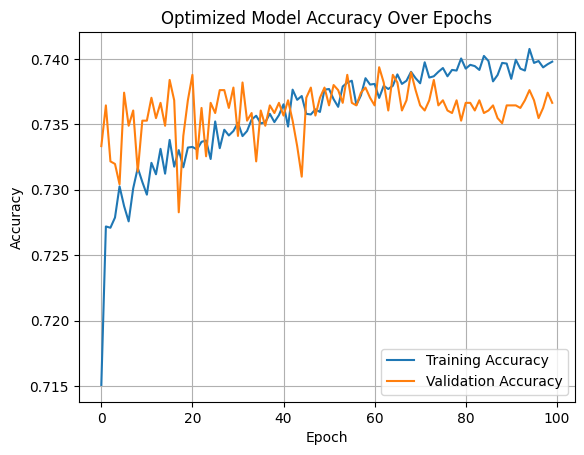

In [23]:
import matplotlib.pyplot as plt

plt.plot(optimized_fit.history['accuracy'], label='Training Accuracy')
plt.plot(optimized_fit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Optimized Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
#Results

# Model Performance
# - Original Model Accuracy:67%
# - Optimized Model Accuracy: 73%
# - Loss Values: Original: 84, Optimized: 57

# Changes
# - Increased number of neurons
# - Added fourth hidden layer
#

# Summary
# Adding more complexity to the model improved accuracy

# Alternative Model
# A Random Forest Classifier would be a good next step: